In [17]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow import keras

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True, rotation_range=100,
    width_shift_range=0.2,
    height_shift_range=0.2)

In [10]:
training_set=train_datagen.flow_from_directory('dataset/training_set',target_size=(64,64),batch_size=32,class_mode='binary')

Found 8000 images belonging to 2 classes.


In [11]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
test_set = test_datagen.flow_from_directory(
        'dataset/test_set',
        target_size=(64,64),
        batch_size=32,
        class_mode='binary')

Found 2000 images belonging to 2 classes.


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense

In [14]:
cnn=Sequential()

In [24]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[64,64,3]))

In [25]:
cnn.add(MaxPool2D(pool_size=2,strides=2))

In [26]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(MaxPool2D(pool_size=2,strides=2))

In [27]:
cnn.add(Flatten())

In [29]:
cnn.add(Dense(128,activation='relu'))
cnn.add(Dense(1,activation='sigmoid'))

In [32]:
cnn.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [34]:
cnn.fit(x=training_set,validation_data=test_set,epochs=30)

Epoch 1/30
250/250 [==============================] - 73s 291ms/step - loss: 0.7086 - accuracy: 0.5372 - val_loss: 0.6086 - val_accuracy: 0.6815
Epoch 2/30
250/250 [==============================] - 54s 218ms/step - loss: 0.6039 - accuracy: 0.6792 - val_loss: 0.5909 - val_accuracy: 0.6980
Epoch 3/30
250/250 [==============================] - 54s 217ms/step - loss: 0.5756 - accuracy: 0.6935 - val_loss: 0.5473 - val_accuracy: 0.7200
Epoch 4/30
250/250 [==============================] - 54s 215ms/step - loss: 0.5358 - accuracy: 0.7319 - val_loss: 0.5298 - val_accuracy: 0.7330
Epoch 5/30
250/250 [==============================] - 54s 216ms/step - loss: 0.5168 - accuracy: 0.7507 - val_loss: 0.4889 - val_accuracy: 0.7625
Epoch 6/30
250/250 [==============================] - 54s 217ms/step - loss: 0.4866 - accuracy: 0.7646 - val_loss: 0.5380 - val_accuracy: 0.7120
Epoch 7/30
250/250 [==============================] - 50s 199ms/step - loss: 0.4794 - accuracy: 0.7706 - val_loss: 0.5121 - val_ac

<AxesSubplot:>

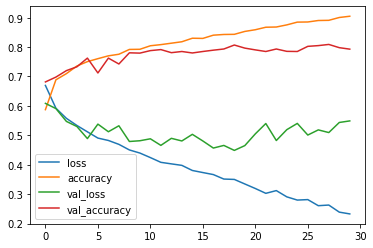

In [37]:
pd.DataFrame(cnn.history.history).plot()

In [39]:
pd.DataFrame(cnn.history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.669624,0.587250,0.608600,0.6815
1,0.592077,0.688750,0.590892,0.6980
2,0.557665,0.709750,0.547279,0.7200
3,0.533437,0.735625,0.529839,0.7330
4,0.511862,0.750500,0.488885,0.7625
5,0.490585,0.760625,0.538048,0.7120
6,0.482451,0.770250,0.512143,0.7625
7,0.469224,0.775625,0.532442,0.7425
8,0.450232,0.792000,0.478978,0.7805
9,0.439671,0.792500,0.481514,0.7795


In [41]:
import numpy as np
training_set.class_indices

{'cats': 0, 'dogs': 1}